In [1]:
%pip install roboflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
from roboflow import Roboflow
import zipfile
import os
import json
import torchvision.transforms as transforms
from torchvision.datasets import CocoDetection
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random
from dotenv import load_dotenv

In [ ]:
# Load environment variables from .env file
load_dotenv()

# Get the API key from the environment variable
api_key = os.getenv('ROBOFLOW_API_KEY')

In [4]:
rf = Roboflow(api_key=api_key)
project = rf.workspace("roboflow-gw7yv").project("self-driving-car")
version = project.version(3)
dataset = version.download("coco")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Self-Driving-Car-3 in coco:: 100%|██████████| 29804/29804 [00:29<00:00, 1021.28it/s]


In [4]:
# Preprocess images and annotations
data_dir = "Self-Driving-Car-3"
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [8]:
%pip install pycocotools

Note: you may need to restart the kernel to use updated packages.


In [22]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.patches as patches
from PIL import Image

In [6]:
# Initialize COCO object
coco = COCO('Self-Driving-Car-3\export\_annotations.coco.json')

invalid escape sequence '\e'
invalid escape sequence '\e'
invalid escape sequence '\e'


loading annotations into memory...
Done (t=6.02s)
creating index...
index created!


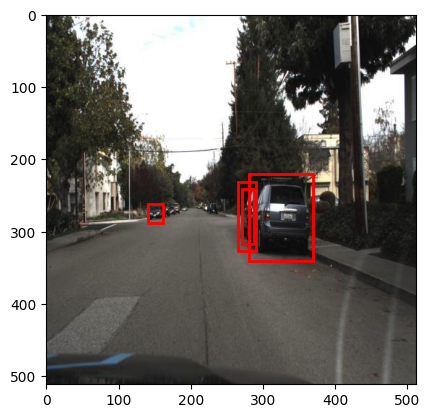

In [37]:
# Get image and annotation IDs
img_id = coco.getImgIds()[0]
img_info = coco.loadImgs(img_id)[0]
img_path = 'Self-Driving-Car-3/export/' + img_info['file_name']

# Load the image
img = Image.open(img_path)

# Load annotations for the image
ann_ids = coco.getAnnIds(imgIds=img_info['id'])
anns = coco.loadAnns(ann_ids)

# Display the image and annotations
plt.imshow(img)
ax = plt.gca()

for ann in anns:
    bbox = ann['bbox']
    x, y, w, h = bbox
    rect = plt.Rectangle((x, y), w, h, fill=False, color='red', linewidth=2)
    ax.add_patch(rect)

plt.axis('on')
plt.show()


In [26]:
print(anns)

[{'id': 0, 'image_id': 0, 'category_id': 2, 'bbox': [140, 262, 21, 25.5], 'area': 535.5, 'segmentation': [], 'iscrowd': 0}, {'id': 1, 'image_id': 0, 'category_id': 2, 'bbox': [266, 231, 24, 95.5], 'area': 2292, 'segmentation': [], 'iscrowd': 0}, {'id': 2, 'image_id': 0, 'category_id': 2, 'bbox': [271, 241, 17, 76], 'area': 1292, 'segmentation': [], 'iscrowd': 0}, {'id': 3, 'image_id': 0, 'category_id': 2, 'bbox': [280, 220, 89.5, 121], 'area': 10829.5, 'segmentation': [], 'iscrowd': 0}]


In [30]:
# List all categories in the dataset
categories = coco.loadCats(coco.getCatIds())
category_names = [cat['name'] for cat in categories]
print("Categories:", category_names)

Categories: ['obstacles', 'biker', 'car', 'pedestrian', 'trafficLight', 'trafficLight-Green', 'trafficLight-GreenLeft', 'trafficLight-Red', 'trafficLight-RedLeft', 'trafficLight-Yellow', 'trafficLight-YellowLeft', 'truck']


In [31]:
# Count annotations for each category
for category in categories:
    cat_id = category['id']
    annotation_ids = coco.getAnnIds(catIds=cat_id)
    print(f"Category: {category['name']}, Number of annotations: {len(annotation_ids)}")


Category: obstacles, Number of annotations: 0
Category: biker, Number of annotations: 3704
Category: car, Number of annotations: 127873
Category: pedestrian, Number of annotations: 21491
Category: trafficLight, Number of annotations: 5101
Category: trafficLight-Green, Number of annotations: 10838
Category: trafficLight-GreenLeft, Number of annotations: 614
Category: trafficLight-Red, Number of annotations: 13673
Category: trafficLight-RedLeft, Number of annotations: 3482
Category: trafficLight-Yellow, Number of annotations: 541
Category: trafficLight-YellowLeft, Number of annotations: 28
Category: truck, Number of annotations: 7194
